Massive Star Lifetimes
======================
Parametrize how long massive stars live.

Use data from MIST (Choi et al. 2016; ApJ, 823, 102): http://adsabs.harvard.edu/abs/2016ApJ...823..102C

Data download are EEP models from: http://waps.cfa.harvard.edu/MIST/model_grids.html

Using the [Fe/H]=-1.75 version as typical for GC metallicities.

In [1]:
%matplotlib inline

In [2]:
# Imports
import read_mist_models
import numpy as np
import matplotlib.pyplot as plt
import glob

In [3]:
# Model filenames
model = 'MIST_v1.0_feh_m1.75_afe_p0.0_vvcrit0.4_EEPS'
file_list = glob.glob(model+'/*.track.eep*')

In [4]:
%%capture
# Read in the models. THIS TAKES A LONG TIME.
# create data structures to hold masses and lifetimes
mstarinit = []
lifetime = []
# iterate through models
for file in file_list:
        # Check if this is an uninterpolated version of a file that has an INTERP version.
        # If so, skip.
        if file+'_INTERP' in file_list:
                continue

        # Read MIST model
        eep = read_mist_models.EEP(file)

        # store initial mass and lifetime
        mstarinit.append(eep.minit)
        lifetime.append(eep.eeps['star_age'].max())

# numpyize
mstarinit = np.array(mstarinit)
loglifetime = np.log10(np.array(lifetime))

Plot the following lifetime estimates:
 - MIST [Fe/H]=-1.75
 - Polynomial fit: $\log\tau = -0.086 (\log m)^3 + 0.95 (\log m)^2 - 3.17 \log m + 9.77$
 - Analytic estimate: $\tau = 10^{10} m^{-2.5}$

In [5]:
#Set up anaytic versions
m = np.arange(1,120,0.5)
def polyfit(m):
    lm = np.log10(m)
    return -0.086 * lm**3 + 0.95 * lm**2 - 3.17 * lm + 9.77

analytfit = np.log10(1e10 * m**(-2.5))

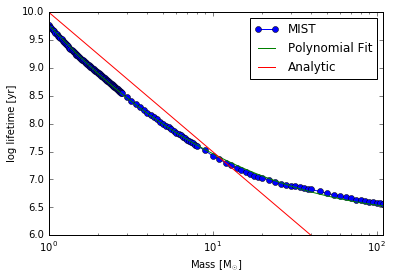

In [6]:
#Plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(mstarinit, loglifetime, 'o-', label='MIST')
ax.plot(m, polyfit(m), '-', label='Polynomial Fit')
ax.plot(m, analytfit, '-', label='Analytic')
ax.set_xlim(1,110)
ax.set_ylim(6,10)
ax.set_xlabel('Mass [M$_{\odot}$]')
ax.set_ylabel('log lifetime [yr]')
ax.set_xscale('log')
ax.legend(loc='best');

In [7]:
# How long does MIST say a 1 Msun star lives
10.0**(loglifetime[mstarinit==1.0])

array([  5.79980149e+09])

Conclusions:
 - The simple analytic scaling badly underestimates massive star lifetimes and can't be used.
 - The polynomial fit looks good (see below), so I shouldn't need to actually spend the enormous time reading in those models!
 - But I'm suspicious at low masses. According to MIST, a 1 $M_{\odot}$ star has a lifetime of 5.8 Gyr, not 10 Gyr! Could simply be metallicity difference.

How good is the polynomial fit?
-------------------------------

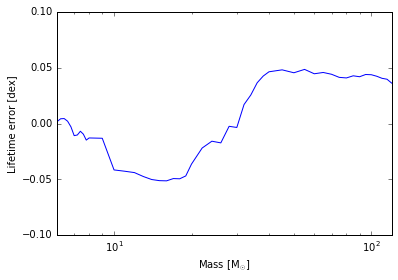

In [8]:
plt.plot(mstarinit, loglifetime-polyfit(mstarinit))
plt.xlabel('Mass [M$_{\odot}$]')
plt.ylabel('Lifetime error [dex]')
plt.xscale('log')
plt.xlim(6,120)
plt.ylim(-0.1,0.1);

Over the relevant mass range, the polynomial fit is good to within 0.05 dex, or 12%, of the MIST results.